Let $\tau_i$ denote the membrane time constant of neuron $i$. Then, up to the approximations related to the assumption of being in an Asynchronous Irregular state, we have the following forumalas for the mean and SD (standard deviation) of the input to different neurons. 

$\mu_i = \tau_i \sum_j W_{ij} r_j + h_i$

$\sigma^2_i = \tau_i \sum_j W_{ij}^2 r_j + \xi^2_i$

where $h_i$ and $\xi_i$ are the mean (which is positive) and SD of the external input, respectively.

And then the output firing rate of each neuron is given by 

$r_i = \Phi(\mu_i, \sigma_i) \qquad\qquad\qquad$     (1)

If I plug in the first two equations (where each is really $N$ equations) in the bottom one (again, really $N$ equations), then I obtain a system of $N$ equations for the $N$ unknowns, namely the $r_i$.  (part of) Your tasks is to solve this ssytem of equations. To do that, we will first promote these to time-dependent ODE's. These are auxiliary tools for us to find the fixed point, and are not really physical:

$T_i\frac{dr_i}{dt} + r_i = \Phi(\mu_i, \sigma_i)$

We will then solve these numerically using the Euler method (see my `utils_for_max.py`), and hope that the ODE's will converge onto a fixed point, which satisfies (1). The Euler discretization leads to

$r_i(t+1) = (1 - \alpha_i) r_i(t) + \alpha_i \Phi(\mu_i, \sigma_i)$

where I defined $\alpha_i = \frac{\delta t}{T_i}$. But to use `utils_for_max.Euler2fixedpt` you don't really need to do this, but you need to give it (as `dxdt`) the following:

$T_i^{-1} (-r_i + \Phi(\mu_i, \sigma_i))$ with the above expressions for $\mu$ and $\sigma$ plugged in. 


In the rest, I assume that you have already substituted the expressions for $\mu_i$ and $\sigma_i$, but won't write them explicitly for brevity.

In the 



In [1]:
import numpy as np
from model import Model, theta_diff, block_matrix
from utils_for_max import Phi, Euler2fixedpt
import utils_for_max
import matplotlib.pyplot as plt

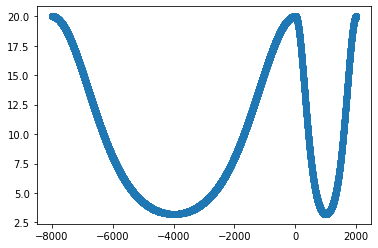

In [2]:
# Define model with N_E and N_I
model = Model(8000, 2000)

# Assigning parameters J, P, w^2
J = np.log([[0.63, 0.6],
            [0.32, 0.25]])

P = np.log([[0.11, 0.11], 
            [0.45, 0.45]])

w = np.log(32) * np.ones([2,2])
            
model.set_parameters(J, P, w)

model.set_inputs(1, 0)

plt.scatter(np.array(range(model.N)) - model.N_E, model.h)

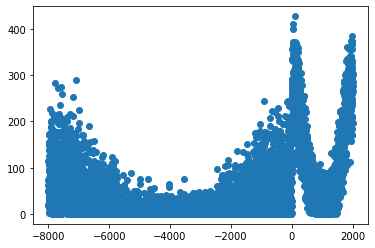

In [3]:
model.generate_network()
model.solve_fixed_point()  # Is producing overflow error!
plt.scatter(np.array(range(model.N)) - model.N_E, model.r)

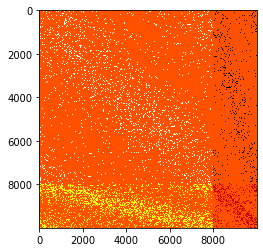

In [4]:
plt.imshow(model.W, cmap='hot', interpolation='nearest')
plt.show()

In [5]:
curves = model.get_tuning_curves()

KeyboardInterrupt: 